In [1]:
import sys
sys.path.append("./Tagging/lib/python3.6/site-packages")

import numpy as np
import pandas as pd

import re

import matplotlib.pyplot as plt

from functions import *

#Locate and list all xlms files so they can be opened all together

import os

xlms_files = []
for root, dirs, files in os.walk("."):  
    for filename in files:
        if filename[-4:]=='xlsm':  #Add to the list if the element's last four spaces form the word "xlsm"
            xlms_files += [filename]
        
xlms_files

['Rolls Royce Derby EOS Rotatives.xlsm',
 'Rolls Royce Jubilee House.xlsm',
 'Tag_50888200_Bristol_Canons_House.xlsm',
 'Tag_50964119_Chester_Tower_House.xlsm',
 'Tag_50450069_Andover_Keens_House.xlsm',
 'Tag_50963912_Cheadle_Heath_Heathside_Park.xlsm',
 'Vodafone Atlas Park.xlsm',
 'Rolls Royce Heathrow.xlsm',
 'Rolls Royce Barnoldswick.xlsm']

In [2]:
#concatenate all files into a huge dataset

inputs = []
shapes = []

for file in xlms_files:
    file = "Spreadsheets/" + file
    xl = pd.ExcelFile(file)
    if "Input" in xl.sheet_names:
        df = xl.parse('Output for SkySpark') #Go to "Tagging" tab
        #print(df.shape[0])
        shapes += [df.shape[0]]
        inputs += [df] 

inputs = pd.concat(inputs) #Concatenate them one below the next one
inputs = inputs.dropna(subset=["service"]) #Drop row if service value is equals zero
inputs = inputs.reset_index() #Restart the index from zero to its length
inputs = inputs.drop(columns=["index"]) #Drop old index
inputs = inputs.fillna(0)

In [3]:
inputs

pointId                        siteLabel      service       equipName  \
0            1  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
1            2  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
2            3  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
3            4  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
4            5  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
5            6  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
6            7  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
7            8  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
8            9  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
9           10  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
10          11  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
11          12  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
12          13  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
13          14  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
14          15  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
15          16  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
16          17  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
17          18  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
18          19  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
19          20  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
20          21  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
21          22  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
22          23  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
23          24  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
24          25  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
25          26  Rolls Royce Derby EOS Rotatives      Cooling     Compressors   
26          27  Rolls Royce Derby EOS Rotatives      Cooling   Potable Water   
27          28  Rolls Royce Derby EOS Rotatives      Cooling   Potable Water   
28          29  Rolls Royce Derby EOS Rotatives      Cooling   Potable Water   
29          30  Rolls Royce Derby EOS Rotatives      Cooling   Potable Water   
...        ...                              ...          ...             ...   
10054      313         Rolls Royce Barnoldswick    Terminals  MANTECH UNIT 1   
10055      314         Rolls Royce Barnoldswick    Terminals  MANTECH UNIT 1   
10056      315         Rolls Royce Barnoldswick    Terminals  MANTECH UNIT 2   
10057      316         Rolls Royce Barnoldswick    Terminals  MANTECH UNIT 2   
10058      317         Rolls Royce Barnoldswick    Terminals  MANTECH UNIT 2   
10059      318         Rolls Royce Barnoldswick    Terminals  MANTECH UNIT 2   
10060      319         Rolls Royce Barnoldswick    Terminals  MANTECH UNIT 2   
10061      320         Rolls Royce Barnoldswick    Terminals  MANTECH UNIT 2   
10062      321         Rolls Royce Barnoldswick  Ventilation      Supply Fan   
10063      322         Rolls Royce Barnoldswick  Ventilation     Extract Fan   
10064      323         Rolls Royce Barnoldswick  Ventilation     Extract Fan   
10065      324         Rolls Royce Barnoldswick  Ventilation     Extract Fan   
10066      325         Rolls Royce Barnoldswick  Ventilation     Extract Fan   
10067      326         Rolls Royce Barnoldswick  Ventilation       FBH AHU 1   
10068      327         Rolls Royce Barnoldswick  Ventilation       FBH AHU 1   
10069      328         Rolls Royce Barnoldswick  Ventilation      Supply Fan   
10070      329         Rolls Royce Barnoldswick  Ventilation      Supply Fan   
10071      330         Rolls Royce Barnoldswick  Ventilation      Supply Fan   
10072  

In [4]:
#inputs = inputs.drop_duplicates(subset={"pointLabel"})

In [5]:
#final_data

In [6]:
class SequenceIterator:
    def __init__(self, dataset, label_points, outputs, dictionary):
        
        self.dataset = dataset
        self.label_points = label_points
        self.outputs = outputs
        
        self.labels = dataset[label_points]
        self.y = dataset[outputs]
        
        self.dictionary = dictionary
              
    def __iter__(self):
        for label,tags in zip(self.labels, self.y):
            
            label = label
            #Eliminate numbers?
            label = re.sub(r"[0-9]","",label)
            label = re.sub("[.]"," ",label)
            #Lower case characters
            label = label.lower().split()
            
            tags = re.sub(","," ",tags)
            tags = tags.split()
            
            #Clean it from dictionary            
            for i in range(0,len(label)):
                if label[i] in dictionary:
                    label[i] = dictionary[label[i]][0]
                    
            words = [w for w in label]
            
            yield words, tags

In [7]:
dictionary = pd.read_csv("dict.csv",header=None).set_index(0).T.to_dict("list")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [8]:
validate = load_validation_sheet()

sentences = SequenceIterator(inputs, "pointLabel", "pointTags", dictionary)
sentences_service_val = SequenceIterator(validate, "pointLabel", "pointTags", dictionary)

y = []
words = []

y_service_val = []
words_service_val = []

for label, tags in sentences:
    words += [label]
    y += [tags]
    
for i in range(0,len(y)):
    if "oneA" in y[i]:
        y[i].remove("oneA")

for label, tags in sentences_service_val:
    words_service_val += [label]
    y_service_val += [tags]
    
for i in range(0,len(y_service_val)):
    if "oneA" in y_service_val[i]:
        y_service_val[i].remove("oneA")
        
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()

multilabel_binarizer.fit(y)
unique_tags_listed = multilabel_binarizer.classes_
y_onehot = multilabel_binarizer.fit_transform(y)

multilabel_binarizer.fit(y_service_val)
unique_tags_listed_val = multilabel_binarizer.classes_
y_onehot_val = multilabel_binarizer.fit_transform(y_service_val)

labels = [" ".join(label) for label in words]
labels_df = pd.DataFrame(labels, columns=["Label"])
tags_df = pd.DataFrame(y_onehot,columns=unique_tags_listed)
categories = list(tags_df.columns.values)
print(categories)

data = pd.concat([labels_df,tags_df], axis=1)
data_pointTags, data_val_pointTags, categories_pointTags = data_prep(words, words_service_val, y_onehot, unique_tags_listed)
data_pointTags

['air', 'alarm', 'chilled', 'cmd', 'co2', 'cool', 'damper', 'discharge', 'enable', 'energy', 'entering', 'extract', 'flow', 'frost', 'heat', 'holdOff', 'hot', 'humidifier', 'humidity', 'leaving', 'mixed', 'occupied', 'outside', 'override', 'pressure', 'recirc', 'return', 'run', 'sensor', 'sp', 'speed', 'temp', 'valve', 'water', 'zone']
['air', 'alarm', 'chilled', 'cmd', 'co2', 'cool', 'damper', 'discharge', 'enable', 'energy', 'entering', 'extract', 'flow', 'frost', 'heat', 'holdOff', 'hot', 'humidifier', 'humidity', 'leaving', 'mixed', 'occupied', 'outside', 'override', 'pressure', 'recirc', 'return', 'run', 'sensor', 'sp', 'speed', 'temp', 'valve', 'water', 'zone']


Label  air  alarm  chilled  cmd  co2  cool  \
0                compressor house fans    0      0        0    1    0     0   
1              compressed air pressure    1      0        0    0    0     0   
2                 compressions air met    1      0        0    0    0     0   
3      compressor air high pressure sp    1      0        0    0    0     0   
4       compressor air low pressure sp    0      0        0    0    0     0   
5            compressor extract fan sp    0      0        0    0    0     0   
6                compressor house temp    1      0        0    0    0     0   
7                     compressor fault    0      1        0    0    0     0   
8                     compressor fault    0      1        0    0    0     0   
9                     compressor fault    0      1        0    0    0     0   
10                    compressor fault    0      1        0    0    0     0   
11                    compressor fault    0      1        0    0    0     0   
12       compressor extract fans fault    0      1        0    0    0     0   
13                condenser unit fault    0      1        0    0    0     0   
14               cryo compressor fault    0      1        0    0    0     0   
15                     cryo unit fault    0      1        0    0    0     0   
16          compressor air hi-pressure    0      0        0    0    0     0   
17          compressor air lo-pressure    0      0        0    0    0     0   
18                  compress air pulse    0      0        0    0    0     0   
19                  compressor running    0      0        0    0    0     0   
20                  compressor running    0      0        0    0    0     0   
21                  compressor running    0      0        0    0    0     0   
22                  compressor running    0      0        0    0    0     0   
23                  compressor running    0      0        0    0    0     0   
24     compressor extract fans running    0      0        0    0    0     0   
25             condenser high ph level    0      0        0    0    0     0   
26                 potable cws booster    0      0        0    1    0     0   
27                   potable low water    0      0        0    1    0     0   
28                  potable tank level    0      0        0    0    0     0   
29               potable booster fault    0      1        0    0    0     0   
...                                ...  ...    ...      ...  ...  ...   ...   
10054               mantech u htrs o r    0      0        0    0    0     0   
10055                    mantech units    0      0        0    0    0     0   
10056                 mantech z u htrs    0      0        0    1    0     0   
10057                  mantech z unocc    1      0        0    0    0     0   
10058          mantech z s p occupancy    1      0        0    0    0     0   
10059                    mantech space    1      0        0    0    0     0   
10060               mantech u htrs o r    0      0        0    0    0     0   
10061                    mantech units    0      0        0    0    0     0   
10062                       supply fan    0      0        0    1    0     0   
10063           ahu extract fan enable    0      0        0    1    0     0   
10064            ahu extract fan speed    0      0        0    1    0     0   
10065   ahu extract fan inverter fault    0      1        0    0    0     0   
10066             ahu extract fan fail    0      0        0    0    0     0   
10067                      fbh ahu fan    0      0        0    1    0     0   
10068               fbh ahu fan failed    0      0        0    0    0     0   
10069            ahu supply fan enable    0      0        0    1    0     0   
10070             ahu supply fan speed    0      0        0    1    0     0   
10071    ahu supply fan inverter fault    0      1        0    0    0     0   
10072          ahu supply fan air flow    0      0        0    0    0     0   
1007

In [9]:
data_pointTags.to_csv("dataset_only_labels.csv")

In [10]:
n_tags = []

for tag in categories:
    n_tags += [data_pointTags[tag].tolist().count(1)]

In [11]:
import matplotlib.pyplot as plt

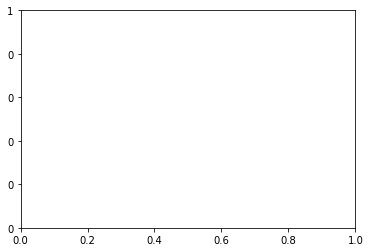

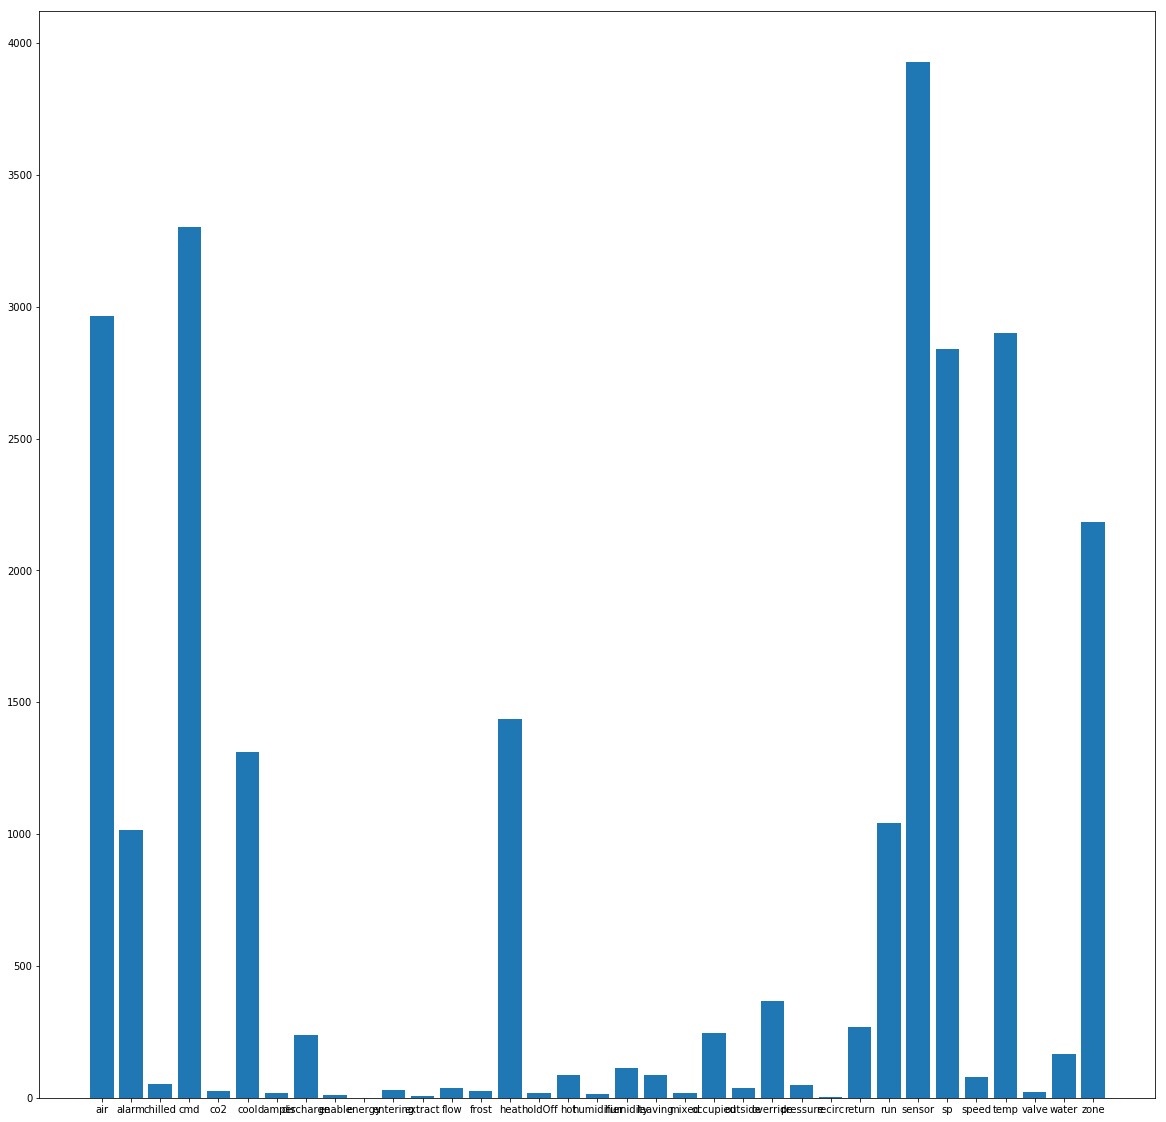

In [12]:
from matplotlib.ticker import FuncFormatter

x = np.arange(len(categories))
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]


def millions(x, pos):
    'The two args are the value and tick position'
    return '%1i' % (x * 1)


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.figure(figsize=(20,20))
plt.bar(x, n_tags)
plt.xticks(x, categories)
plt.show()

In [13]:
import warnings
warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings

import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from gensim.models import Word2Vec    

In [14]:
#These are more formal text, so I'll not use this function at this point
stop = set(stopwords.words('english')) 

In [15]:
labels = data_pointTags["Label"].tolist()

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_pointTags, random_state=12, test_size=0.1, shuffle=True)

In [17]:
y_train = train.drop(labels = ['Label'], axis=1)
y_test = test.drop(labels = ['Label'], axis=1)

In [18]:
import re

def preprocessing(labels):
    
    temp =[]
    snow = nltk.stem.SnowballStemmer('english')
    for sentence in labels:
        sentence = sentence.lower()                 # Converting to lowercase
        cleanr = re.compile('<.*?>')
        sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
        sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
        sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
        
        words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
        temp.append(words)
        
    final_X = temp  
    
    return final_X

In [19]:
train = preprocessing(train["Label"].tolist())
test = preprocessing(test["Label"].tolist())

In [20]:
def joinsentences(final_X):    
    sent = []
    for row in final_X:
        sequ = ''
        for word in row:
            sequ = sequ + ' ' + word
        sent.append(sequ)
    
    final_X = sent
    
    return final_X

In [21]:
train = joinsentences(train)
test = joinsentences(test)

In [37]:
count_vect = CountVectorizer(max_features=10000)
bow_data_train = count_vect.fit_transform(train)
bow_data_test = count_vect.transform(test)
print(bow_data_train[1])

  (0, 59)	1
  (0, 692)	1
  (0, 306)	1
  (0, 229)	1
  (0, 14)	1


In [39]:
final_B_X_train = train
final_B_X_test = test
count_vect = CountVectorizer(ngram_range=(1,2))
Bigram_data_train = count_vect.fit_transform(final_B_X_train)
Bigram_data_test = count_vect.transform(final_B_X_test)
print(Bigram_data_train[1])

  (0, 3053)	1
  (0, 1574)	1
  (0, 1113)	1
  (0, 62)	1
  (0, 373)	1
  (0, 3052)	1
  (0, 1561)	1
  (0, 1101)	1
  (0, 33)	1


In [40]:
final_tf_train = train
final_tf_test = test
tf_idf = TfidfVectorizer(max_features=5000)
tf_data_train = tf_idf.fit_transform(final_tf_train)
tf_data_test = tf_idf.transform(final_tf_test)
print(tf_data_train[1])

  (0, 14)	0.26487851818885344
  (0, 229)	0.43748983501751787
  (0, 306)	0.6181340174839943
  (0, 692)	0.5693417334918935
  (0, 59)	0.17945010947883158


In [68]:
size = 5

w2v_data_train = train
w2v_data_test = test

def w2v(w2v_data, data_test):
    
    splitted = []
    splitted_test = []
    for row in w2v_data: 
        splitted.append([word for word in row.split()]) #splitting words
        
    for row in data_test: 
        splitted_test.append([word for word in row.split()]) #splitting words
        
    train_w2v = Word2Vec(splitted,min_count=2,size=size, workers=1)
    
    avg_data = []
    for row in splitted:
        vec = np.zeros(size)
        count = 0
        for word in row:
            try:
                vec += train_w2v[word]
                count += 1
            except:
                pass
        avg_data.append(vec/count)
    
    avg_data_test = []
    for row in splitted_test:
        vec = np.zeros(size)
        count = 0
        for word in row:
            try:
                vec += train_w2v[word]
                count += 1
            except:
                pass
        avg_data_test.append(vec/count)
    
    return avg_data, avg_data_test, splitted, splitted_test, train_w2v

avg_data_train, avg_data_test, splitted_train, splitted_test, train_w2v_train = w2v(w2v_data_train, w2v_data_test)
#avg_data_test, splitted_test, train_w2v_test = w2v(w2v_data_test)

print(avg_data_train[1])

[ 1.21445038 -0.50653495 -0.20363655  0.30945167 -0.69842429]


In [25]:
len(train),len(test)

(4503, 501)

In [26]:
w2v_tfidf_data_train = train
w2v_tfidf_data_test = test

def w2v_tfidf(tf_w_data, splitted, train_w2v):
    
    tf_idf = TfidfVectorizer(max_features=5000)
    tf_idf_data = tf_idf.fit_transform(tf_w_data)
    
    tf_w_data = []
    tf_idf_data = tf_idf_data.toarray()
    i = 0
    
    for row in splitted:
        vec = [0 for i in range(50)]
        temp_tfidf = []
        for val in tf_idf_data[i]:
            if val != 0:
                temp_tfidf.append(val)
        
        count = 0
        tf_idf_sum = 0
        for word in row:
        
            try:
                #print(count)
                count += 1
                #print(temp_tfidf)
                tf_idf_sum = tf_idf_sum + temp_tfidf[count-1]
                vec += (temp_tfidf[count-1] * train_w2v[word])
                
            #print("yes")
            #print(temp_tfidf[count-1] * train_w2v[word])
            except:
                #print("no")
                pass
        #print(vec)
        #print(type(tf_idf_sum))
        vec = (float)(1/tf_idf_sum)*np.array(vec).astype(float)
        tf_w_data.append(vec)
        i = i + 1
    
    return tf_w_data

tf_w_data_train = w2v_tfidf(w2v_tfidf_data_train, splitted_train, train_w2v_train)
tf_w_data_test = w2v_tfidf(w2v_tfidf_data_test, splitted_test, train_w2v_test)

print(tf_w_data_train[1])

[ 0.51423973 -0.10151329 -0.05752953  0.06075425 -0.13004729 -0.44831076
 -0.00205931 -0.08602151 -0.04736944  0.07800143  0.02667112  0.26076473
 -0.19986064 -0.18602322  0.23251742 -0.06092746  0.05122782 -0.06655725
 -0.02206888 -0.02323097 -0.1383452  -0.08358554  0.3861237   0.17680705
 -0.12308866 -0.4523711  -0.12142754  0.08505568  0.0055702  -0.04204885
 -0.0782635  -0.06387857 -0.31054462 -0.15159066 -0.44233792  0.18969167
 -0.13174226  0.02475195  0.02363028  0.03509859 -0.25560836  0.0518176
 -0.46228981 -0.07193885  0.01301412 -0.18289898  0.089684   -0.22285782
  0.19075225 -0.17828184]


In [29]:
from sklearn.svm import LinearSVC
from skmultilearn.problem_transform import LabelPowerset

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [30]:
def LinearSVC_classifier(x_train, x_test, y_train, y_test):

    %%time
    
    # initialize label powerset multi-label classifier
    classifier = LabelPowerset(LinearSVC())
    
    # train
    classifier.fit(x_train, y_train)
    
    # predict
    predictions = classifier.predict(x_test)
    #predictions_val = classifier.predict(data_val)
    
    # accuracy
    print("Accuracy = ",accuracy_score(y_test,predictions))
    print("\n")

In [42]:
LinearSVC_classifier(bow_data_train, bow_data_test, y_train, y_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Accuracy =  0.8163672654690619




In [47]:
LinearSVC_classifier(Bigram_data_train, Bigram_data_test, y_train, y_test)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10.5 µs
Accuracy =  0.8682634730538922




In [48]:
LinearSVC_classifier(tf_data_train, tf_data_test, y_train, y_test)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
Accuracy =  0.810379241516966




In [69]:
LinearSVC_classifier(avg_data_train, avg_data_test, y_train, y_test)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11 µs
Accuracy =  0.30538922155688625




In [70]:
LinearSVC_classifier(tf_w_data_train, tf_w_data_test, y_train, y_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
Accuracy =  0.2155688622754491


